# PERCEPTRON

##### LOAD THE DATA

In [1]:
import numpy as np

# each row contains Sepal length in cm, Sepal width in nm and type (0|1)
# 0: Iris-setosa | 1: Iris-versicolor
data = np.loadtxt('iris-data.csv', delimiter=',')
data

array([[5.1, 3.5, 0. ],
       [4.9, 3. , 0. ],
       [4.7, 3.2, 0. ],
       [4.9, 3. , 0. ],
       [4.6, 3.1, 0. ],
       [4.6, 3.1, 0. ],
       [4.7, 3.2, 0. ],
       [4.6, 3.4, 0. ],
       [5.4, 3.9, 0. ],
       [5. , 3.6, 0. ],
       [4.7, 3.2, 0. ],
       [4.7, 3.2, 0. ],
       [5.1, 3.5, 0. ],
       [4.4, 2.9, 0. ],
       [5. , 3.4, 0. ],
       [5.4, 3.7, 0. ],
       [4.8, 3.4, 0. ],
       [4.8, 3. , 0. ],
       [5.8, 4. , 0. ],
       [4.8, 3.4, 0. ],
       [4.4, 2.9, 0. ],
       [5.1, 3.5, 0. ],
       [5.8, 4. , 0. ],
       [4.4, 2.9, 0. ],
       [5.5, 2.3, 1. ],
       [5.4, 3.9, 0. ],
       [5.7, 3.8, 0. ],
       [5.4, 3.9, 0. ],
       [5.4, 3.9, 0. ],
       [5.4, 3.9, 0. ],
       [5.7, 4.4, 0. ],
       [4.8, 3.4, 0. ],
       [5.7, 2.8, 1. ],
       [4.7, 3.2, 0. ],
       [5.4, 3.7, 0. ],
       [4.9, 3.1, 0. ],
       [5.2, 2.7, 1. ],
       [4.8, 3.4, 0. ],
       [5.7, 2.8, 1. ],
       [4.8, 3. , 0. ],
       [6.5, 2.8, 1. ],
       [4.8, 3.4

##### VISUALIZE THE DATA
It is a good idea to visualize the data so we can confirm that the data is linearly separable.

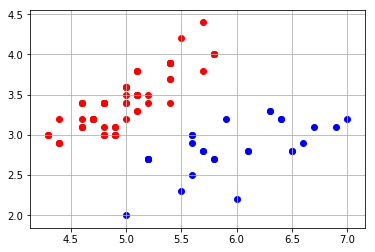

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.grid()

for i in range(len(data)) :
    point = data[i]
    if point[2] == 0 :
        color = 'r'  # setosas will appear in blue
    else:
        color = 'b'  # versicolor will appear in red
    
    plt.scatter(point[0], point[1], c=color);

In [3]:
from IPython.display import Image
from IPython.core.display import HTML 

Image(url= 'https://farm9.staticflickr.com/8383/8675226902_e72273713f_k.jpg', width=350, height=350)

##### DEFINE TRAINING AND TESTING SETS

In [4]:
# split data into training and testing sets
train_data = data[:70]   # 70%
test_data = data[70:]    # 30%

In [5]:
from sklearn.model_selection import train_test_split

target = data[:, -1]
data = data[:, :-1]

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.30, random_state=42)

X_train.shape

(68, 2)

##### TRAIN THE MODEL

In [6]:
from sklearn.metrics import mean_squared_error

np.random.seed(93)

class Perceptron(object):
    def __init__(self, learning=0.01, n_epochs=20):
        self.learning = learning
        self.n_epochs = n_epochs
    
    def predict(self, X):
        pred = np.dot(X, self.w_) + self.b_
        return 1.0 if pred >= 0.0 else 0.0
    
    def fit(self, X, y):
        # iniciate the weights and bias
        self.w_ = np.random.uniform(0, 1, X.shape[1])
        self.b_ = np.random.uniform(0, 1, 1)
        
        self.costList_ = []

        for ep in range(self.n_epochs):
            cost_epoch = 0
            for xi, target in zip(X, y):
                # cost function
                pred = self.predict(xi)
                cost = np.square(target - pred)
                cost_epoch += float(cost/len(X))  # MSE
                
                # update weights and bias
                update = self.learning * (target - pred)
                self.w_ += update * xi
                self.b_ += update
            
            # store MSE through every epoch iteration
            self.costList_.append(cost_epoch)
            
            # print model improvements
            print("Epoch: {:04}\tLoss: {:06.5f}".format((ep+1), cost_epoch), end='')
            print("\t\tRegression: {:.2f}(X1) + {:.2f}(X2) + {:.2f}".format(self.w_[0],
                                                                      self.w_[1],
                                                                      float(self.b_)))
        return self

In [7]:
clf = Perceptron()
clf.fit(X_train, y_train)

Epoch: 0001	Loss: 0.58824		Regression: -0.08(X1) + 0.03(X2) + 0.15
Epoch: 0002	Loss: 0.39706		Regression: -0.02(X1) + -0.09(X2) + 0.14
Epoch: 0003	Loss: 0.32353		Regression: 0.06(X1) + -0.15(X2) + 0.14
Epoch: 0004	Loss: 0.02941		Regression: 0.06(X1) + -0.15(X2) + 0.14
Epoch: 0005	Loss: 0.00000		Regression: 0.06(X1) + -0.15(X2) + 0.14
Epoch: 0006	Loss: 0.00000		Regression: 0.06(X1) + -0.15(X2) + 0.14
Epoch: 0007	Loss: 0.00000		Regression: 0.06(X1) + -0.15(X2) + 0.14
Epoch: 0008	Loss: 0.00000		Regression: 0.06(X1) + -0.15(X2) + 0.14
Epoch: 0009	Loss: 0.00000		Regression: 0.06(X1) + -0.15(X2) + 0.14
Epoch: 0010	Loss: 0.00000		Regression: 0.06(X1) + -0.15(X2) + 0.14
Epoch: 0011	Loss: 0.00000		Regression: 0.06(X1) + -0.15(X2) + 0.14
Epoch: 0012	Loss: 0.00000		Regression: 0.06(X1) + -0.15(X2) + 0.14
Epoch: 0013	Loss: 0.00000		Regression: 0.06(X1) + -0.15(X2) + 0.14
Epoch: 0014	Loss: 0.00000		Regression: 0.06(X1) + -0.15(X2) + 0.14
Epoch: 0015	Loss: 0.00000		Regression: 0.06(X1) + -0.15(X2) +

##### VISUALIZE MODEL IMPROVEMENT

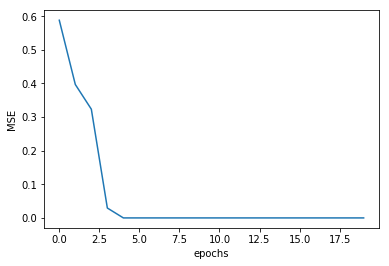

In [8]:
plt.plot(clf.costList_)
plt.xlabel('epochs')
plt.ylabel('MSE');
plt.show()

##### VISUALIZE CONFUSION MATRIX

computing confusion matrix on training sets..


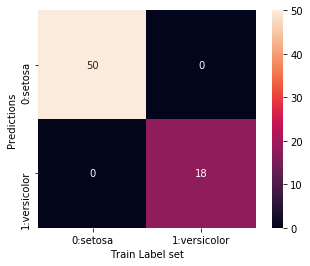

computing confusion matrix on testing sets..


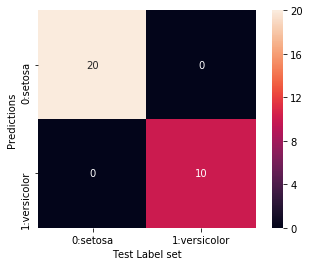

In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# create a confusion matrix for training set
print('computing confusion matrix on training sets..')
matrix_labels = ['0:setosa', '1:versicolor']
train_predictions = [clf.predict(item) for item in X_train]
mat = confusion_matrix(y_train, train_predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            cbar=True, xticklabels=matrix_labels,
            yticklabels=matrix_labels)

plt.xlabel('Train Label set')
plt.ylabel('Predictions')
plt.show()

# create a confusion matrix for testing set
print('computing confusion matrix on testing sets..')
matrix_labels = ['0:setosa', '1:versicolor']
test_predictions = [clf.predict(item) for item in X_test]
mat = confusion_matrix(y_test, test_predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            cbar=True, xticklabels=matrix_labels,
            yticklabels=matrix_labels)

plt.xlabel('Test Label set')
plt.ylabel('Predictions')
plt.show()


###### INDIVIDUAL COMPARISSON OF THE RESULTS

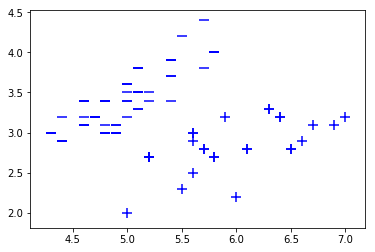

expectedValue vs prediction:	 1.0 | 1.0
expectedValue vs prediction:	 1.0 | 1.0
expectedValue vs prediction:	 0.0 | 0.0
expectedValue vs prediction:	 0.0 | 0.0
expectedValue vs prediction:	 0.0 | 0.0
expectedValue vs prediction:	 1.0 | 1.0
expectedValue vs prediction:	 1.0 | 1.0
expectedValue vs prediction:	 1.0 | 1.0
expectedValue vs prediction:	 0.0 | 0.0
expectedValue vs prediction:	 0.0 | 0.0
expectedValue vs prediction:	 0.0 | 0.0
expectedValue vs prediction:	 0.0 | 0.0
expectedValue vs prediction:	 1.0 | 1.0
expectedValue vs prediction:	 0.0 | 0.0
expectedValue vs prediction:	 1.0 | 1.0
expectedValue vs prediction:	 0.0 | 0.0
expectedValue vs prediction:	 0.0 | 0.0
expectedValue vs prediction:	 0.0 | 0.0
expectedValue vs prediction:	 1.0 | 1.0
expectedValue vs prediction:	 0.0 | 0.0
expectedValue vs prediction:	 0.0 | 0.0
expectedValue vs prediction:	 1.0 | 1.0
expectedValue vs prediction:	 0.0 | 0.0
expectedValue vs prediction:	 0.0 | 0.0
expectedValue vs prediction:	 0.0 | 0.0


In [10]:
for i, point in enumerate(data):
    # Plot the negative samples
    out = clf.predict(point)
    if out==0:
        plt.scatter(point[0], point[1], s=120, marker='_', linewidths=2, color='blue')
    # Plot the positive samples
    else:
        plt.scatter(point[0], point[1], s=120, marker='+', linewidths=2, color='blue')
plt.show()

for i in range(len(y_test)):
    print('expectedValue vs prediction:\t {} | {}'.format(y_test[i], clf.predict(X_test[i])))

##### TRY IT BY YOURSELF

In [11]:
try_me = [5.5,  2.3]
print('Iris-versicolor' if clf.predict(try_me) else 'Iris-setosa')

Iris-versicolor
